In [61]:
[(p, Gamma(p).index(), Gamma(p).ncusps(), Gamma1(p).index(), Gamma1(p).ncusps(), Gamma0(p).index()) for p in primes(50)]

[(2, 6, 3, 3, 2, 3),
 (3, 24, 4, 8, 2, 4),
 (5, 120, 12, 24, 4, 6),
 (7, 336, 24, 48, 6, 8),
 (11, 1320, 60, 120, 10, 12),
 (13, 2184, 84, 168, 12, 14),
 (17, 4896, 144, 288, 16, 18),
 (19, 6840, 180, 360, 18, 20),
 (23, 12144, 264, 528, 22, 24),
 (29, 24360, 420, 840, 28, 30),
 (31, 29760, 480, 960, 30, 32),
 (37, 50616, 684, 1368, 36, 38),
 (41, 68880, 840, 1680, 40, 42),
 (43, 79464, 924, 1848, 42, 44),
 (47, 103776, 1104, 2208, 46, 48)]

In [321]:
[Gamma1(p).cusps() for p in primes(3,12)]

[[0, Infinity],
 [0, 2/5, 1/2, Infinity],
 [0, 2/7, 1/3, 3/7, 1/2, Infinity],
 [0, 2/11, 1/5, 1/4, 3/11, 1/3, 4/11, 5/11, 1/2, Infinity]]

In [320]:
Gamma(3).cusps()

[0, 1, 2, Infinity]

In [187]:
[2 * Gamma(p).ncusps() / Gamma1(p).ncusps() - 1 for p in primes(3,50)]

[3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]

In [177]:
p = 5
vals = frozenset((3/5,))
ts = frozenset(QQ(r) for r in Gamma1(p).cusps() if r != Infinity)
gs = frozenset(g^i for g in Gamma1(p).gens() for i in (1, -1))
while len(ts & vals) == 0:
    vals = frozenset(g.acton(r) for g in gs for r in vals)
    ts = frozenset(g.acton(r) for g in gs for r in ts)
ts & vals

0


frozenset({2/5})

In [184]:
frozenset((g, i, (g^i).acton(0)) for g in Gamma1(p).gens() for i in (1, -1))

frozenset({(
[-4  1]         
[-5  1], -1, 1/4
),
           (
[-4  1]      
[-5  1], 1, 1
),
           (
[1 1]        
[0 1], -1, -1
),
           (
[1 1]      
[0 1], 1, 1
),
           (
[11 -4]          
[25 -9], -1, 4/11
),
           (
[11 -4]        
[25 -9], 1, 4/9
)})

In [168]:
vals = frozenset((Cusp(3/5),))
vals = frozenset(g.acton(r) for g in gs for r in vals)
print list(vals)[3], list(ts)[2], list(vals)[3] == list(ts)[2]

2/5 2/5 True


In [173]:
type(list(ts)[2])

<class 'sage.modular.cusps.Cusp'>

In [175]:
type(list(vals)[3])

<type 'sage.rings.rational.Rational'>

In [68]:
Gamma1(11).genus()

1

In [191]:
Gamma0(2).genus()

0

In [190]:
Gamma0(2).nu2()

1

In [79]:
Gamma1(2).nu3()

0

In [209]:
[p for p in primes(50) if Gamma0(p).genus() == 1]

[11, 17, 19]

In [340]:
G.coset_reps()

[
[1 0]  [1 1]  [ 0 -1]  [ 0 -1]  [ 1 -1]  [1 0]
[0 1], [0 1], [ 1  0], [ 1  1], [ 1  0], [1 1]
]

In [216]:
S, T = Gamma(1).gens()

In [341]:
[I, T, S, S*T, T*S, T*S*T]

[
[1 0]  [1 1]  [ 0 -1]  [ 0 -1]  [ 1 -1]  [1 0]
[0 1], [0 1], [ 1  0], [ 1  1], [ 1  0], [1 1]
]

In [236]:
(T^(-1) * S * T * S)

[-2  1]
[ 1 -1]

In [235]:
T^(-2) * S * T^(-1)

[-2  1]
[ 1 -1]

In [237]:
T*S*T*S

[ 0 -1]
[ 1 -1]

In [389]:
def growset(s):
    return set(g^i * h^j for g in s for h in s for i in (-1, 1) for j in (-1, 1) if not (g == T^2 and h == T^2))

In [407]:
G = Gamma(2)
pm1 = (-1, 1)
gens = set(G.gens() + (I,))
gens2 = growset(gens)
gens3 = growset(gens2)
print len(gens), len(gens2), len(gens3)

4 20 176


In [310]:
[parametric_plot(f1, (t, 0, 1), color=col) + parametric_plot(f2, (t, 0, .9999),color=col) for g in gs for f1, f2 in (dofns(g),) for col in (hue(random()),)]

[Graphics object consisting of 2 graphics primitives,
 Graphics object consisting of 2 graphics primitives,
 Graphics object consisting of 2 graphics primitives,
 Graphics object consisting of 2 graphics primitives,
 Graphics object consisting of 2 graphics primitives,
 Graphics object consisting of 2 graphics primitives]

In [353]:
GGG = growset(GG)

Exception KeyboardInterrupt: KeyboardInterrupt() in 'zmq.backend.cython.message.Frame.__dealloc__' ignored


KeyboardInterrupt: 

In [411]:
gs = gens3
def dofns(g):
    f1c(t) = g.acton(exp(pi*ii*(3+t)/6))
    f2c(t) = g.acton(-1/2 + ii*(sqrt(3)/2 - log(1-t)))
    f1r(t) = real(f1c(t))
    f1i(t) = imag(f1c(t))
    f2r(t) = real(f2c(t))
    f2i(t) = imag(f2c(t))
    f1 = (f1r(t), f1i(t))
    f2 = (f2r(t), f2i(t))
    return (f1, f2)
P = sum([parametric_plot(f1, (t, 0, 1), color='red') + parametric_plot(f2, (t, 0, .9999), color='red') for g in gs for f1, f2 in (dofns(g),) for col in (hue(random()),)])

In [412]:
P1 = P

In [354]:
G = Gamma(2)
G.coset_reps()

[
[1 0]  [1 1]  [ 0 -1]  [ 0 -1]  [ 1 -1]  [1 0]
[0 1], [0 1], [ 1  0], [ 1  1], [ 1  0], [1 1]
]

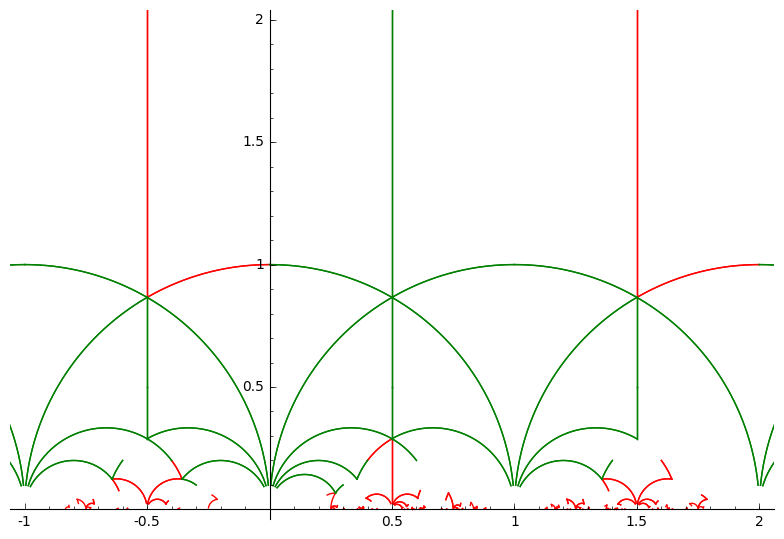

In [413]:
(P1 + P2).show(ymin=0,ymax=2,xmin=-1,xmax=2)

In [264]:
exp(log(23))

23

In [278]:
imag(3)

0

In [294]:
hue(random())

(0.0, 0.9393829279494783, 1.0)

In [308]:
f1

cos(1/2*pi + 1/6*pi*real_part(t))*e^(-1/6*pi*imag_part(t))

In [334]:
G.coset_reps()

[
[1 0]  [1 1]  [ 0 -1]  [ 0 -1]  [ 1 -1]  [1 0]
[0 1], [0 1], [ 1  0], [ 1  1], [ 1  0], [1 1]
]

In [336]:
T = G.coset_reps()[1]
S = G.coset_reps()[2]
print S, T

[ 0 -1]
[ 1  0] [1 1]
[0 1]


In [316]:
b=var('b')

In [328]:
type(m)

<type 'sage.modular.arithgroup.arithgroup_element.ArithmeticSubgroupElement'>

In [331]:
G.coset_reps()[0]

[1 0]
[0 1]

-79
-47


In [425]:
fundamental_discriminant(-2)

-8

In [428]:
is_fundamental_discriminant(-2)

False

In [432]:
def norm_equation(D,p):
    """ Solves the norm equation 4p=t^2-v^2D for t and v given D and a probable prime p.  Either returns a solution (t,v) or () if no solution exists """
    assert D < 0
    if -D >= 4*p: return ()
    if p==2:
        if is_square(D+8): return (sqrt(D+8),1)
        return ()
    if kronecker(D,p) == -1: return ()
    F=GF(p,proof=false)
    x0=F(D).sqrt().lift()
    assert not (x0^2 - D) % p  # just in case p isn't prime
    if (x0-D)%2: x0 = p - x0
    a = 2*p; t=x0; m = floor(2*sqrt(p))
    while t > m: (a,t)=(t,a%t)
    if (4*p-t^2) % (-D): return ()
    c = ZZ((4*p-t^2)/(-D))
    if not is_square(c): return ()
    v=sqrt(c)
    assert 4*p == t^2-v^2*D
    return (t,v)

In [511]:
l = 2
D = -79
for D in range(-100, 0):
    if is_fundamental_discriminant(D) and hilbert_class_polynomial(D).degree() == 5:
        print D
for p in primes(2000):
    tv = norm_equation(D, p)
    if tv != ():
        t, v = tv
        if (l^3).divides(v):
            for j, n in hilbert_class_polynomial(D).change_ring(GF(p)).roots():
                A = 3*j*(1728-j)
                B = 2*j*(1728-j)^2
                E = EllipticCurve([A, B])

In [450]:
kronecker(-47, 2)

1

In [466]:
%latex
Hello \[ x=f(x) \]

SyntaxError: invalid syntax (<ipython-input-466-3fbc1b963066>, line 2)

In [474]:
E.j_invariant() in Graph({E.j_invariant(): []})

True

In [623]:
def isogeny_graph(l, E):
    from sage.graphs.graph_plot import _circle_embedding
    j = E.j_invariant()
    G = Graph({j: []}, loops=True)
    frontier = set([(E, j)])
    while len(frontier) > 0:
        newfrontier = set()
        for E0, j0 in frontier:
            for iso in E0.isogenies_prime_degree(l):
                E1 = iso.codomain()
                j1 = E1.j_invariant()
                if j1 not in G:
                    G.add_vertex(j1)
                    newfrontier.add((E1, j1))
                G.add_edge(j0, j1)
        frontier = newfrontier
    cycs = G.cycle_basis()
    assert len(cycs) == 1
    surface = cycs[0]
    n = len(surface)
    pos = {}
    for i in range(len(surface)):
        v0 = surface[i]
        ang = 2*pi*i/n
        tree = G.subgraph(v for v in G if len(G.all_paths(v,v0)) == 1).layout(layout='tree', tree_root=v0, tree_orientation='right')
        x0, y0 = tree[v0]
        tree0 = {v: (x - x0, y - y0) for v, (x, y) in tree.iteritems()}
        c, s = cos(ang), sin(ang)
        x1, y1 = c, s
        newpos = {v: (x1 + x*c - y*s, y1 + x*s + y*c) for v, (x, y) in tree0.iteritems()}
        if v0 == 383:
            print tree
            print tree0
            print newpos
        pos.update(newpos)
    G.layout(pos=pos, save_pos=True)
    G.name(str(l) + '-isogeny graph of ' + str(E))
    return G

{1217: (2, 2.5), 682: (3, 2.0), 813: (3, 0.0), 846: (2, 0.5), 368: (3, 1.0), 343: (1, 1.5), 573: (3, 3.0), 383: (0, 1.5)}
{1217: (2, 1.0), 682: (3, 0.5), 813: (3, -1.5), 846: (2, -1.0), 368: (3, -0.5), 343: (1, 0.0), 573: (3, 1.5), 383: (0, 0.0)}
{1217: (-3.0148362354173153, 0.9543387625024723), 682: (-3.529960603646026, 1.9466325119824193), 813: (-2.3543900990610798, 3.564666500732314), 846: (-1.8392657308323686, 2.572372751252367), 368: (-2.9421753513535527, 2.7556495063573667), 343: (-1.6180339887498947, 1.1755705045849465), 573: (-4.117745855938499, 1.137615517607472), 383: (-0.8090169943749473, 0.5877852522924732)}


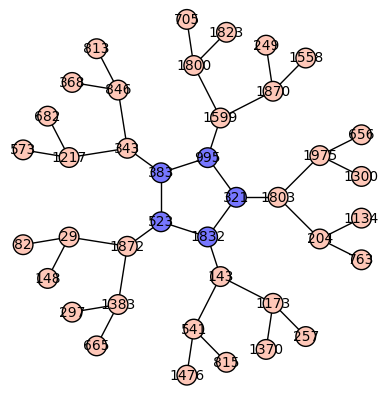

In [624]:
G = isogeny_graph(l, E)
col = {'#7777FF': G.cycle_basis()[0]}
G.plot(vertex_colors=col)

{321: (0, 1.5), 1803: (1, 1.5), 204: (2, 0.5), 1134: (3, 1.0), 656: (3, 3.0), 1300: (3, 2.0), 1975: (2, 2.5), 763: (3, 0.0)}


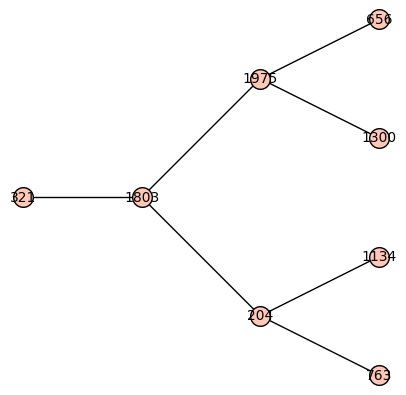

In [620]:
v0 = 321
H = G.subgraph(v for v in G if len(G.all_paths(v,v0)) == 1)
print H.layout(layout='tree', tree_root=v0, tree_orientation='right', save_pos=True)
H.plot()

In [610]:
383 in H

True

In [497]:
from sage.graphs.graph_plot import _circle_embedding

In [512]:
isos = E.isogenies_prime_degree(2)

In [507]:
iso = isos[0]

In [508]:
iso.is_injective()

False

In [513]:
[iso.is_injective() for iso in isos]

[False, False, False]

In [514]:
G.cycle_basis()

[[321, 995, 383, 523, 1832]]

In [546]:
G.layout_spring(save_pos=True);

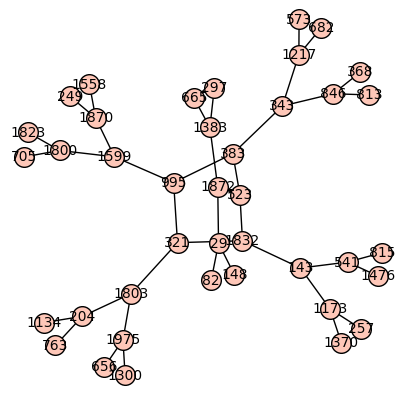

In [540]:
G.plot()

In [547]:
G._pos

{29: [0, 0],
 82: [1.1542519386856327, -0.37085760524139816],
 143: [1.5765357240116789, -0.313012454590933],
 148: [1.2640507013385716, -0.3448617335024283],
 204: [0.5444902591857202, -0.5416336055927073],
 249: [0.48648082829975914, 0.4988645437070546],
 257: [1.8644425640387816, -0.6013776322580131],
 297: [1.1689361740122768, 0.5395537570245071],
 321: [0.9946921376601034, -0.19297098279585684],
 343: [1.491127324974142, 0.4539546264947951],
 368: [1.860415333345665, 0.614680502239481],
 383: [1.256469864366515, 0.2280651559531856],
 523: [1.2899537173591609, 0.03498704059064622],
 541: [1.7995551063977442, -0.28494012674704555],
 573: [1.570151928051105, 0.8637497999552517],
 656: [0.6482939498987182, -0.7815120674351024],
 665: [1.0725063941744013, 0.491631018944547],
 682: [1.6758966795715873, 0.825333880888772],
 705: [0.2679948614425135, 0.21269631514709517],
 763: [0.4169015648425435, -0.6794358036518755],
 813: [1.9014884054514616, 0.5063058449626795],
 815: [1.962943188201

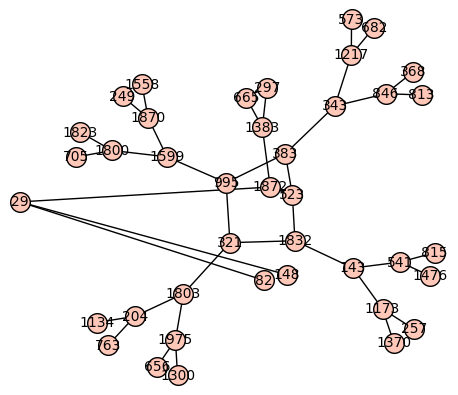

In [543]:
G.plot()

In [549]:
G.all_paths(321,1300)

[[321, 1803, 1975, 1300]]

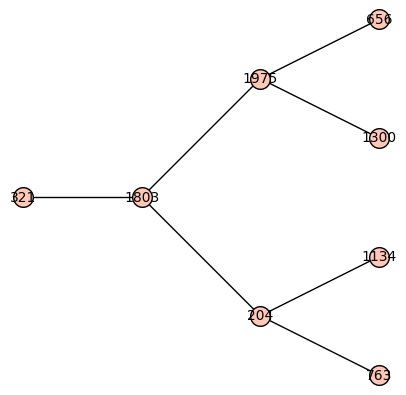

In [593]:
s = G.subgraph(v for v in G if len(G.all_paths(321,v)) == 1)
s.layout(layout='tree', tree_orientation='right', tree_root=321, save_pos=True)
s.plot()

In [576]:
s._pos

{204: (0.5, -2),
 321: (1.5, 0),
 656: (3.0, -3),
 763: (0.0, -3),
 1134: (1.0, -3),
 1300: (2.0, -3),
 1803: (1.5, -1),
 1975: (2.5, -2)}

In [577]:
a = {1: (2, 3)}

In [578]:
a.update({3: (4, 5)})

In [575]:
a

{1: 2, 3: 4}

In [579]:
[x + y + z for x, (y, z) in a.iteritems()]

[6, 12]

In [626]:
E = EllipticCurve(j=0)

In [628]:
E.isogenies_prime_degree(3)

[Isogeny of degree 3 from Elliptic Curve defined by y^2 + y = x^3 over Rational Field to Elliptic Curve defined by y^2 + y = x^3 - 30*x + 63 over Rational Field,
 Isogeny of degree 3 from Elliptic Curve defined by y^2 + y = x^3 over Rational Field to Elliptic Curve defined by y^2 + y = x^3 - 7 over Rational Field]

In [630]:
schmet = [903, 430, 649, 585, 850, 1211, 1129, 392, 409, 643, 564, 831, 1353, 680, 528, 235, 675, 804, 1129, 873, 544, 857, 351, 499, 741, 1245, 624, 849, 2008, 904, 319, 1221, 1284, 727, 1287, 982, 779, 241, 414, 495, 313, 300, 313, 419, 506, 892, 1672, 1379, 648, 807, 838, 634, 1554, 1304, 969, 1263, 1247, 1770, 393, 1215, 1058, 1599, 2047, 1525, 1728, 1529, 799, 1579, 1819, 1853, 1397, 597, 949, 1299, 1167, 1546, 1029, 1405, 1045, 1153, 1341, 864, 1455, 881, 2085, 247, 509, 1225, 1049, 1489, 525, 1015, 599, 500, 1476, 1896, 1327, 640, 672, 612, 436, 1000, 468, 1307, 1263, 1527, 1020, 1556, 1270, 891, 952, 930, 646, 1169, 2012, 1170, 458, 953, 1448, 913, 934, 1544, 1836, 2034, 762, 637, 1007, 665, 1012, 2809, 2972, 2913, 3279, 2116, 2347, 2514, 967, 798, 1094, 1435, 2007, 850, 1376, 2009, 2343, 1809, 1457, 1350, 1697, 685, 1285, 1888, 1793, 2450, 1345, 1816, 1090, 641, 895, 1168, 944, 2481, 737, 536, 1695, 2316, 2511, 1456, 2286, 825, 958, 673, 2167, 2230, 1625, 1173, 809, 1428, 2337, 1863, 2493, 704, 2965, 2320, 1686, 2017, 3505, 1876, 2035, 2802, 2379, 1467, 4781, 1244, 1460, 2402, 1561, 1418, 447, 1418, 2230, 1708, 2414, 3444, 1346, 1181, 2879, 1961, 1771, 1110, 4625, 2694, 2099, 3942, 2761, 3632, 2854, 2168, 2316, 2636, 3182, 5309, 3889, 2737, 3944, 3632, 3254, 2867, 5413, 4746, 6120, 2964, 3382, 4966, 3630, 5132, 3040, 2138, 3059, 2011, 1814, 1943, 1837, 2180, 1704, 2325, 2396, 2203, 1050, 3431, 3005, 3189, 2943, 1331, 1721, 2312, 2269, 1260, 982, 1486, 1280, 1242, 1036, 1965, 3457, 1743, 2688, 2559, 2071, 4560, 3982, 2215, 2881, 2873, 2420, 553, 784, 615, 1767, 1688, 683, 1204, 1360, 2472, 1390, 1599, 949, 1084, 3453, 1218, 1419, 1665, 628, 320, 684, 1008, 1221, 796, 1283, 1096, 1271, 641, 1068, 1637, 1807, 476, 1110, 1094, 2460, 2348, 3604, 1665, 1381, 2744, 838, 1891, 1279, 1898, 1142, 1262, 953, 1767, 780, 963, 2793, 2017, 981, 2101, 1847, 1532, 1364, 1917, 2085, 3567, 6689, 5576, 5680, 3186, 2988, 2208, 2129, 2938, 3030, 1237, 783, 516, 2049, 1594, 1235, 2127, 1639, 732, 955, 470, 1567, 1148, 763, 1663, 2628, 1942, 1403, 1368, 1917, 4004]

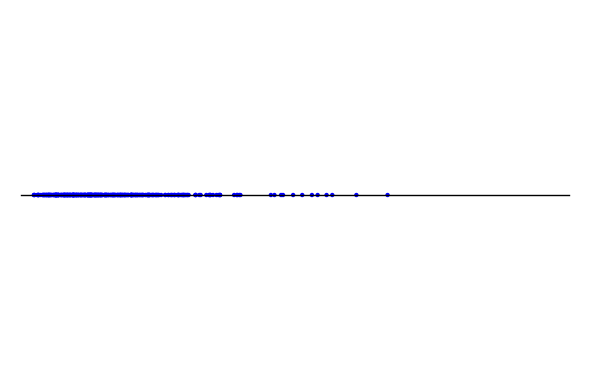

In [636]:
points([(n,0) for n in schmet], axes=False)+line(((0,0),(10000,0)), color='black')

In [637]:
ch = lambda a, b: lambda x: 1 if a < x and x < b else 0

In [650]:
def ch(a, b):
    f(x) = floor(exp(x - a) / exp(abs(x - a))) * floor(exp(b - x) / exp(abs(b - x)))
    return f

In [642]:
exp(1)

e

In [645]:
f(0)

e^(-6)

In [646]:
f(5)

1

In [647]:
f(2)

e^(-2)

In [648]:
f(2.9)

0.818730753077982

In [649]:
f(100)

1

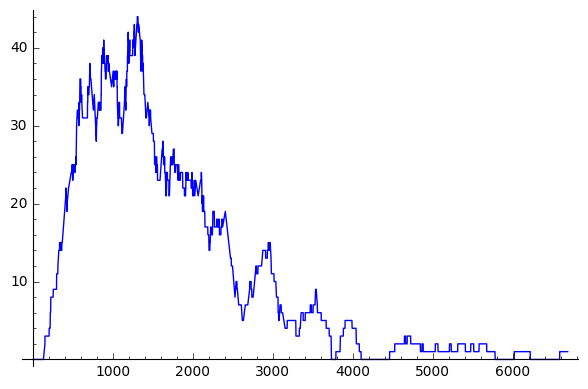

In [665]:
plot(sum(ch(n - 100, n + 100)(x) for n in schmet), (x, 0, max(schmet))) 

In [657]:
delta = ch(-1/2, 1/2)

In [660]:
f(x) = sum(ch(n - 100, n + 100)(x) for n in schmet)

In [664]:
f(500).n()

25.0000000000000